In [17]:
import pandas as pd
import matplotlib.pyplot as plt

train_seq_stats = pd.read_parquet('./data/seq_stats/train_seq_stats.parquet')
test_seq_stats = pd.read_parquet('./data/seq_stats/test_seq_stats.parquet')

display(train_seq_stats.head())
display(test_seq_stats.head())

,seq_len,seq_unique_len,seq_first,seq_last,seq_max,seq_min,seq_mean,seq_std
0,1018,74,9,35,544,9,245.396857,160.921193
1,567,64,9,479,544,9,236.347443,164.943657
2,685,51,269,35,544,15,259.550365,166.456603
3,606,56,269,35,561,15,279.828383,179.578247
4,336,53,144,479,540,15,247.556548,171.058408


,seq_len,seq_unique_len,seq_first,seq_last,seq_max,seq_min,seq_mean,seq_std
0,569,73,321,479,551,11,268.910369,173.525748
1,179,27,57,35,547,35,246.569832,167.864801
2,106,31,57,479,540,15,240.783019,170.863457
3,463,59,144,35,544,15,257.706263,169.171709
4,803,81,269,35,551,15,256.295143,169.272015


In [19]:
outlier_idx = train_seq_stats[train_seq_stats.seq_len > 6000].index

In [20]:
train = pd.read_parquet('./data/train_optimized.parquet')
train.loc[outlier_idx, 'seq']

34379       144,57,516,74,527,318,77,516,114,74,527,77,463...
120813      9,321,269,378,269,269,378,57,516,527,74,77,318...
137263      9,57,516,74,527,207,452,51,508,269,452,207,342...
509593      321,516,403,457,165,173,403,457,173,343,516,16...
915621      9,57,416,416,516,114,527,74,452,207,452,51,479...
1697865     114,516,416,338,114,338,516,416,114,516,338,41...
1972844     9,57,516,527,165,74,77,318,317,306,74,317,77,3...
2080671     35,57,516,165,27,479,57,27,479,57,27,479,27,57...
2293783     114,516,416,338,114,338,516,416,114,516,338,41...
2442424     9,321,269,378,269,269,378,57,516,527,74,77,318...
2488478     9,57,516,74,527,207,452,51,508,269,452,207,342...
2503498     9,321,269,378,269,269,378,57,516,527,74,77,318...
2771382     9,57,516,527,165,74,77,318,317,306,74,317,77,3...
2790267     9,516,114,165,416,338,114,516,165,223,416,223,...
2795681     9,57,516,74,527,207,452,51,508,269,452,207,342...
3420483     57,516,338,416,114,516,189,516,223,479,57,223,...
3787456 

In [24]:
train.loc[outlier_idx, 'seq'].to_excel('outlier_seq.xlsx', index=False)

컬럼 'seq_len'의 범위: 1 ~ 14441
  - 최솟값(1)의 빈도: 59300
  - 최댓값(14441)의 빈도: 1


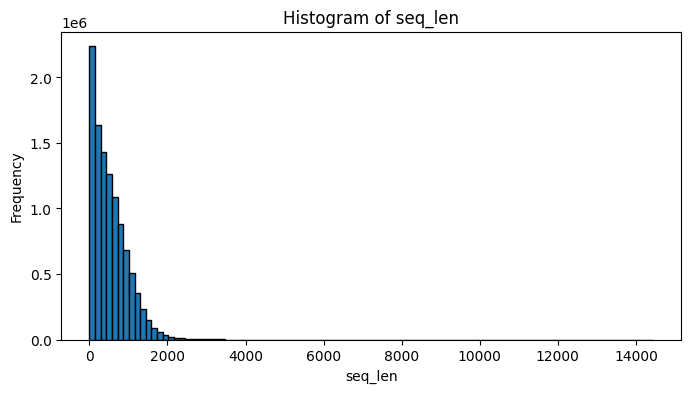

컬럼 'seq_unique_len'의 범위: 1 ~ 188
  - 최솟값(1)의 빈도: 71858
  - 최댓값(188)의 빈도: 1


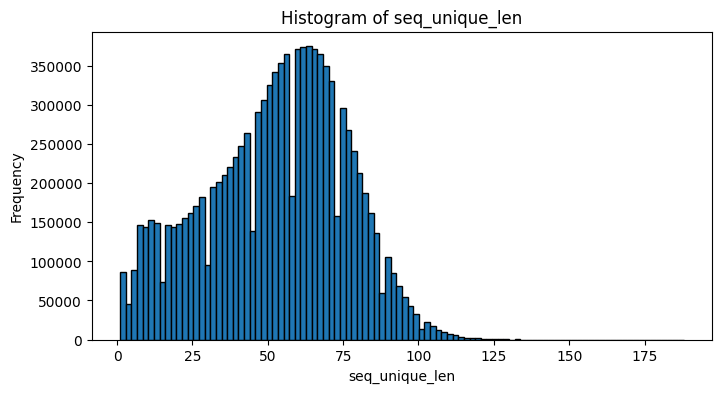

컬럼 'seq_first'의 범위: 1 ~ 586
  - 최솟값(1)의 빈도: 887
  - 최댓값(586)의 빈도: 3


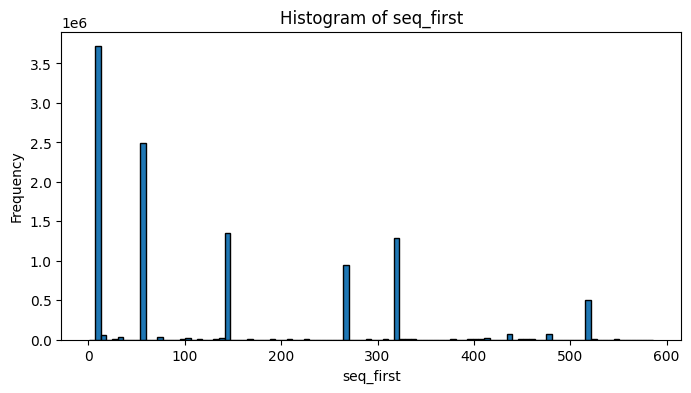

컬럼 'seq_last'의 범위: 1 ~ 585
  - 최솟값(1)의 빈도: 378
  - 최댓값(585)의 빈도: 4


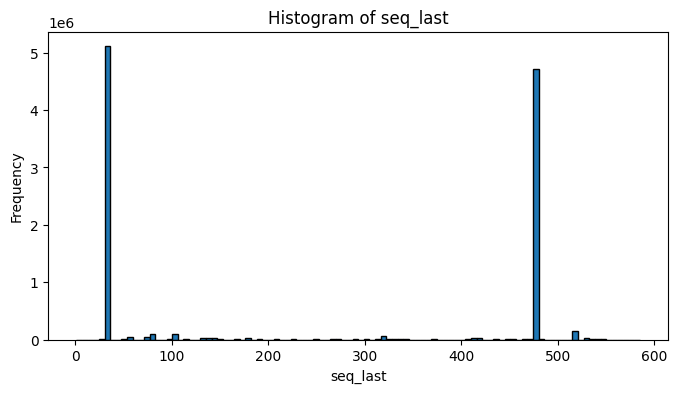

컬럼 'seq_max'의 범위: 1 ~ 594
  - 최솟값(1)의 빈도: 85
  - 최댓값(594)의 빈도: 9


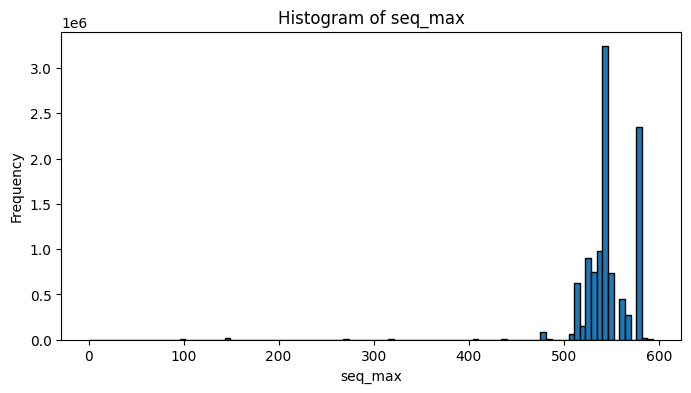

컬럼 'seq_min'의 범위: 1 ~ 547
  - 최솟값(1)의 빈도: 7686
  - 최댓값(547)의 빈도: 121


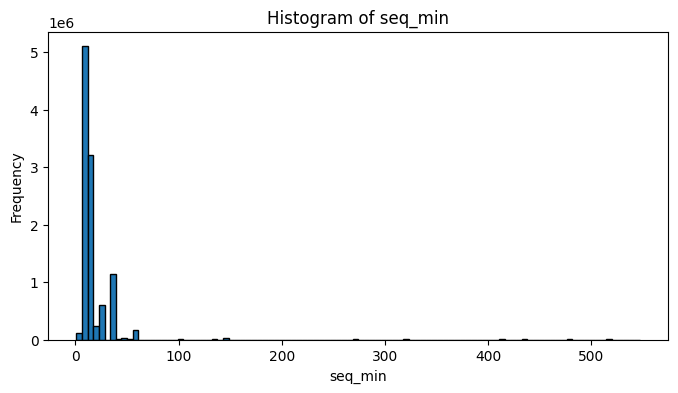

컬럼 'seq_mean'의 범위: 1.0 ~ 547.0
  - 최솟값(1.0)의 빈도: 85
  - 최댓값(547.0)의 빈도: 121


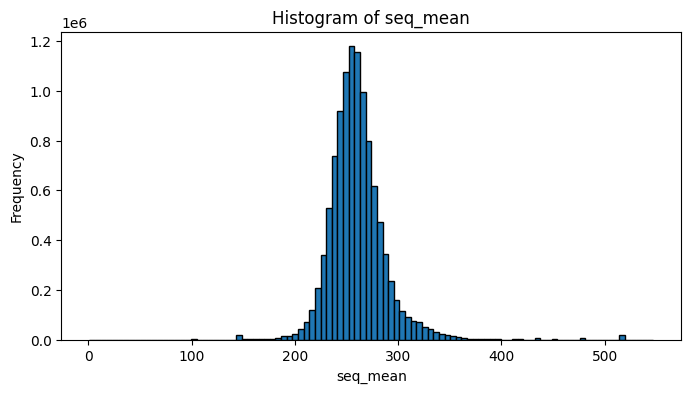

컬럼 'seq_std'의 범위: 0.0 ~ 266.5
  - 최솟값(0.0)의 빈도: 71858
  - 최댓값(266.5)의 빈도: 9


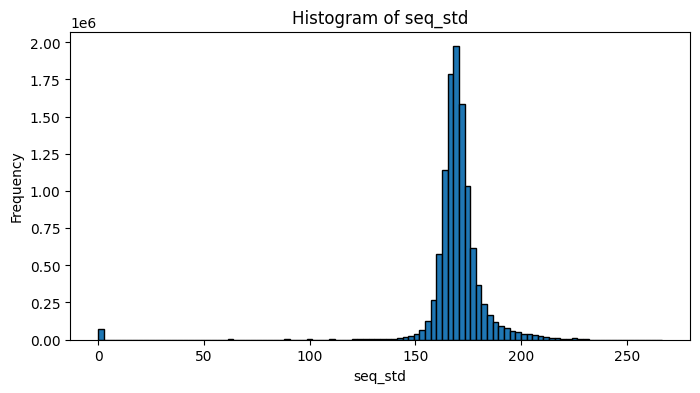

In [3]:
for c in train_seq_stats.columns:
    col_min = train_seq_stats[c].min()
    col_max = train_seq_stats[c].max()
    min_count = (train_seq_stats[c] == col_min).sum()
    max_count = (train_seq_stats[c] == col_max).sum()
    print(f"컬럼 '{c}'의 범위: {col_min} ~ {col_max}")
    print(f"  - 최솟값({col_min})의 빈도: {min_count}")
    print(f"  - 최댓값({col_max})의 빈도: {max_count}")

    plt.figure(figsize=(8, 4))
    plt.hist(train_seq_stats[c], bins=100, edgecolor='black')
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

컬럼 'seq_len'의 범위: 1 ~ 6284
  - 최솟값(1)의 빈도: 59300
  - 최댓값(6284)의 빈도: 8


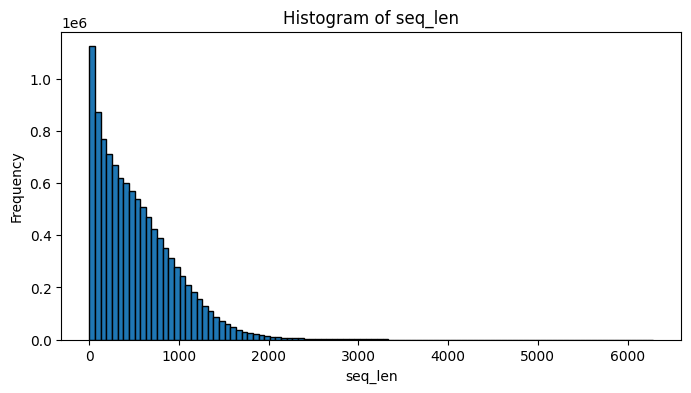

In [16]:
train_seq_stats_no_outlier = train_seq_stats[train_seq_stats.seq_len <= 6300].copy()

for c in ['seq_len']:
    col_min = train_seq_stats_no_outlier[c].min()
    col_max = train_seq_stats_no_outlier[c].max()
    min_count = (train_seq_stats_no_outlier[c] == col_min).sum()
    max_count = (train_seq_stats_no_outlier[c] == col_max).sum()
    print(f"컬럼 '{c}'의 범위: {col_min} ~ {col_max}")
    print(f"  - 최솟값({col_min})의 빈도: {min_count}")
    print(f"  - 최댓값({col_max})의 빈도: {max_count}")

    plt.figure(figsize=(8, 4))
    plt.hist(train_seq_stats_no_outlier[c], bins=100, edgecolor='black')
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
import sqlite3
import pyarrow.parquet as pq
import numpy as np

PARQUETS = ["./data/train_optimized.parquet"]  # 필요 파일 목록
BATCH_SIZE = 100_000
COMMIT_EVERY = 5_000

def iter_tokens_from_parquets(paths, batch_size=BATCH_SIZE):
    for path in paths:
        pf = pq.ParquetFile(path)
        for batch in pf.iter_batches(batch_size=batch_size, columns=["seq"]):
            series = batch.to_pandas()["seq"]
            for s in series:
                if not s:
                    continue
                # 문자열 split 대신 빠른 파싱 (정수형이면 추천)
                # arr = np.fromstring(s, dtype=np.int64, sep=',')  # 정수 토큰일 때
                # for tok in arr: yield int(tok)
                for tok in s.split(','):  # 문자열 토큰이면 이 라인 유지
                    if tok: 
                        yield tok

conn = sqlite3.connect("token_counts.db")
cur = conn.cursor()
cur.execute("PRAGMA journal_mode=WAL;")
cur.execute("PRAGMA synchronous=OFF;")
cur.execute("PRAGMA temp_store=MEMORY;")
cur.execute("CREATE TABLE IF NOT EXISTS counts (token TEXT PRIMARY KEY, cnt INTEGER NOT NULL);")
conn.commit()

# 누적 카운트 (배치 upsert)
buf = {}
n = 0
for tok in iter_tokens_from_parquets(PARQUETS):
    buf[tok] = buf.get(tok, 0) + 1
    n += 1
    if n % COMMIT_EVERY == 0:
        cur.execute("BEGIN;")
        cur.executemany(
            "INSERT INTO counts(token, cnt) VALUES(?, ?) "
            "ON CONFLICT(token) DO UPDATE SET cnt=cnt+excluded.cnt;",
            buf.items(),
        )
        conn.commit()
        buf.clear()

# 잔여 플러시
if buf:
    cur.execute("BEGIN;")
    cur.executemany(
        "INSERT INTO counts(token, cnt) VALUES(?, ?) "
        "ON CONFLICT(token) DO UPDATE SET cnt=cnt+excluded.cnt;",
        buf.items(),
    )
    conn.commit()

# 총 이벤트 수, vocab 사이즈
total_events = cur.execute("SELECT SUM(cnt) FROM counts;").fetchone()[0]
vocab_size   = cur.execute("SELECT COUNT(*) FROM counts;").fetchone()[0]
print(f"total_events={total_events:,}, vocab_size={vocab_size:,}")

# 후보 min_count들에 대한 coverage와 vocab 크기
def coverage_and_vocab(min_count: int):
    cov = cur.execute("SELECT SUM(cnt) FROM counts WHERE cnt >= ?;", (min_count,)).fetchone()[0]
    cov = (cov or 0) / total_events
    voc = cur.execute("SELECT COUNT(*) FROM counts WHERE cnt >= ?;", (min_count,)).fetchone()[0]
    return cov, voc

for m in [1, 3, 5, 10, 20, 50, 100]:
    cov, voc = coverage_and_vocab(m)
    print(f"min_count={m:>3} → vocab={voc:>8,}  coverage={cov:6.3%}")

conn.close()


total_events=5,681,252,407, vocab_size=594
min_count=  1 → vocab=     594  coverage=100.000%
min_count=  3 → vocab=     585  coverage=100.000%
min_count=  5 → vocab=     582  coverage=100.000%
min_count= 10 → vocab=     574  coverage=100.000%
min_count= 20 → vocab=     564  coverage=100.000%
min_count= 50 → vocab=     545  coverage=100.000%
min_count=100 → vocab=     527  coverage=100.000%


In [5]:
conn = sqlite3.connect("token_counts.db")

# min_count <= 5 인 토큰들 확인
df = pd.read_sql_query(
    "SELECT token, cnt FROM counts WHERE cnt <= 5 ORDER BY cnt ASC;",
    conn
)

print(df.head(20))   # 앞부분 20개만 출력
print(f"총 개수: {len(df)}")

conn.close()


   token  cnt
0    583    1
1    211    1
2    578    1
3    579    1
4    574    1
5    580    1
6    581    2
7    588    2
8    123    2
9    591    3
10   329    3
11   587    4
12   251    5
총 개수: 13


In [25]:
import pandas as pd
df = pd.read_parquet('./data/seq_repeat_pattern/train_seq_repeat_pattern.parquet')

df.head()

,max_streak,consecutive_dupe_ratio,is_last_in_streak,num_unique_streaks,avg_streak_length
0,68,0.177800,0,8,4.851064
1,16,0.102293,0,10,2.870968
2,18,0.067153,0,11,3.190476
3,7,0.070957,0,9,2.869565
4,2,0.014881,0,5,2.000000


In [27]:
import pandas as pd
df = pd.read_parquet('./data/seq_compression/train_seq_compressed.parquet')

df.head()

,seq_compressed
0,"9,18,269,516,57,97,527,74,317,311,269,479,57,7..."
1,"9,144,269,57,516,97,527,74,315,317,311,269,479..."
2,"269,516,57,97,165,527,74,77,317,269,75,450,15,..."
3,"269,57,516,21,214,269,561,214,269,561,247,516,..."
4,"144,269,57,516,35,479,57,516,527,74,77,318,193..."
